<a href="https://colab.research.google.com/github/omergunal23/CNN_MNIST/blob/main/CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Train-Test Split

In [ ]:
# conv2D -> (# of samples, height, width, # of channels)
# MNIST dataset -> (60000, 28, 28, 1) has to be done
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# In gray-scale -> # of channels = 1 added as dimension to input data
x_train= x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)

# Normalizing for less computations
x_train=x_train / 255.0
x_test=x_test/255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Number Distribution
unique, counts = np.unique(y_train, return_counts=True)

for digit, count in zip(unique, counts):
    print(f"Number {digit}: {count} ({count/len(y_train):.2%})")

Number 0: 5923 (9.87%)
Number 1: 6742 (11.24%)
Number 2: 5958 (9.93%)
Number 3: 6131 (10.22%)
Number 4: 5842 (9.74%)
Number 5: 5421 (9.04%)
Number 6: 5918 (9.86%)
Number 7: 6265 (10.44%)
Number 8: 5851 (9.75%)
Number 9: 5949 (9.92%)


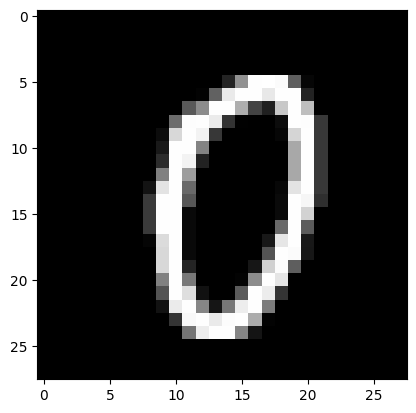

In [ ]:
plt.imshow(x_train[1000][:,:,0], cmap='gray')

Baseline CNN Architecture

In [ ]:
# padding = 'same' -> input size is remained same by padding
# layers.Conv2D(# of kernels, kernel size nxn, ...)
# layers.MaxPooling2D(2) -> 2x2 pooling
# Flatten vectorizes for FULLY connected layers input-> (height, width, channels) → (height × width × channels)
# layers.Dense() -> 3136 ips → 64 ops neuron,  3136 × 64 weights and 64 bias are learned

model = models.Sequential([
    layers.Conv2D(32, 3, padding='same', activation='relu',input_shape=(28,28,1)),
    layers.MaxPooling2D(2),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    # The reason why softmax activation function iis used at the end of conv. layer:
    # 1) All possibilities (ops) sum up to 1, 2) negative outpust are take in account instead of making them all 0s.
    layers.Dense(10, activation='softmax'), # 10 output class
])

In [ ]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │       200,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 220,234 (860.29 KB)

 Trainable params: 220,234 (860.29 KB)

 Non-trainable params: 0 (0.00 B)

Training

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    x_train, y_train,
    batch_size=64,
    epochs=10,
    validation_split=0.2,
    verbose=2
)

Epoch 1/10
750/750 - 66s - 88ms/step - accuracy: 0.8878 - loss: 0.3584 - val_accuracy: 0.9781 - val_loss: 0.0700
Epoch 2/10
750/750 - 69s - 92ms/step - accuracy: 0.9567 - loss: 0.1444 - val_accuracy: 0.9840 - val_loss: 0.0529
Epoch 3/10
750/750 - 68s - 90ms/step - accuracy: 0.9682 - loss: 0.1070 - val_accuracy: 0.9860 - val_loss: 0.0432
Epoch 4/10
750/750 - 70s - 93ms/step - accuracy: 0.9726 - loss: 0.0922 - val_accuracy: 0.9886 - val_loss: 0.0372
Epoch 5/10
750/750 - 76s - 101ms/step - accuracy: 0.9751 - loss: 0.0801 - val_accuracy: 0.9883 - val_loss: 0.0394
Epoch 6/10
750/750 - 85s - 114ms/step - accuracy: 0.9772 - loss: 0.0724 - val_accuracy: 0.9898 - val_loss: 0.0378
Epoch 7/10
750/750 - 84s - 112ms/step - accuracy: 0.9809 - loss: 0.0598 - val_accuracy: 0.9908 - val_loss: 0.0346
Epoch 8/10
750/750 - 54s - 72ms/step - accuracy: 0.9829 - loss: 0.0542 - val_accuracy: 0.9892 - val_loss: 0.0403
Epoch 9/10
750/750 - 79s - 106ms/step - accuracy: 0.9836 - loss: 0.0504 - val_accuracy: 0.991

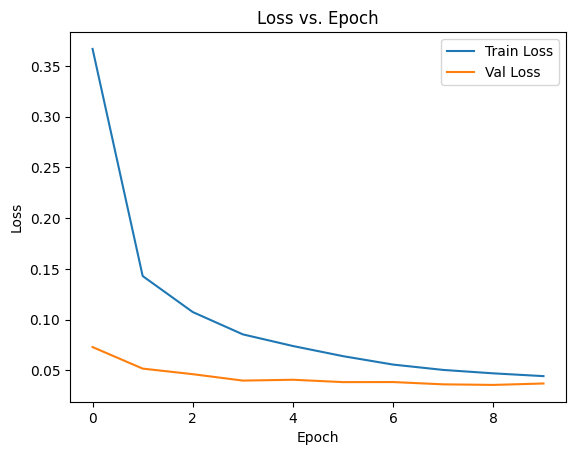

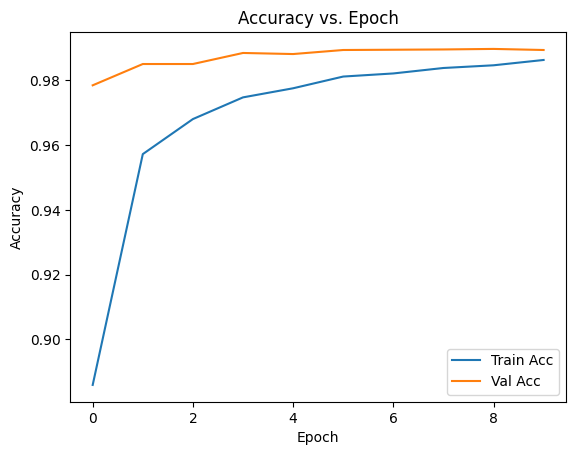

In [ ]:
plt.figure()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.legend()
plt.title('Loss vs. Epoch')
plt.show()

plt.figure()
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.legend()
plt.title('Accuracy vs. Epoch')
plt.show()

Testing

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9902 - loss: 0.0303


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


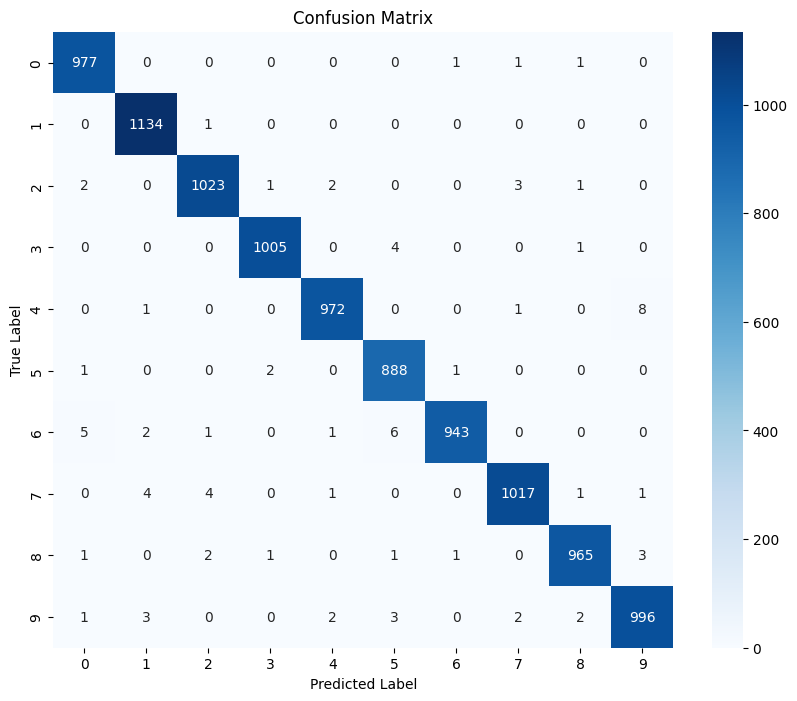

In [ ]:
Y_pred = model.predict(x_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_true = y_test

# Confusion Matrix
confusion_mtx = tf.math.confusion_matrix(Y_true, Y_pred_classes)


plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='g', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

CNN Model-1

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 14, 14, 32)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 7, 7, 64)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       200,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 279,146 (1.06 MB)

 Trainable params: 279,146 (1.06 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
750/750 - 11s - 14ms/step - accuracy: 0.9030 - loss: 0.3170 - val_accuracy: 0.9775 - val_loss: 0.0785
Epoch 2/10
750/750 - 4s - 5ms/step - accuracy: 0.9630 - loss: 0.1265 - val_accuracy: 0.9838 - val_loss: 0.0572
Epoch 3/10
750/750 - 4s - 5ms/step - accuracy: 0.9722 - loss: 0.0978 - val_accuracy: 0.9868 - val_loss: 0.0439
Epoch 4/10
750/750 - 4s - 5ms/step - accuracy: 0.9764 - loss: 0.0829 - val_accuracy: 0.9887 - val_loss: 0.0404
Epoch 5/10
750/750 - 4s - 5ms/step - accuracy: 0.9771 - loss: 0.0781 - val_accuracy: 0.9902 - val_loss: 0.0388
Epoch 6/10
750/750 - 4s - 5ms/step - accuracy: 0.9808 - loss: 0.0668 - val_accuracy: 0.9898 - val_loss: 0.0429
Epoch 7/10
750/750 - 4s - 5ms/step - accuracy: 0.9821 - loss: 0.0600 - val_accuracy: 0.9900 - val_loss: 0.0413
Epoch 8/10
750/750 - 4s - 5ms/step - accuracy: 0.9834 - loss: 0.0564 - val_accuracy: 0.9908 - val_loss: 0.0368
Epoch 9/10
750/750 - 5s - 7ms/step - accuracy: 0.9838 - loss: 0.0550 - val_accuracy: 0.9902 - val_loss: 0.0384

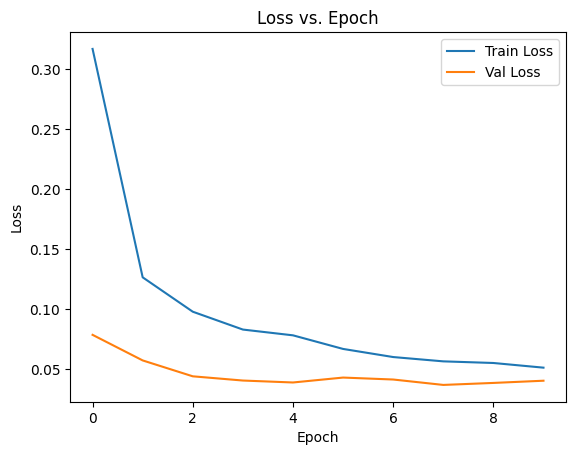

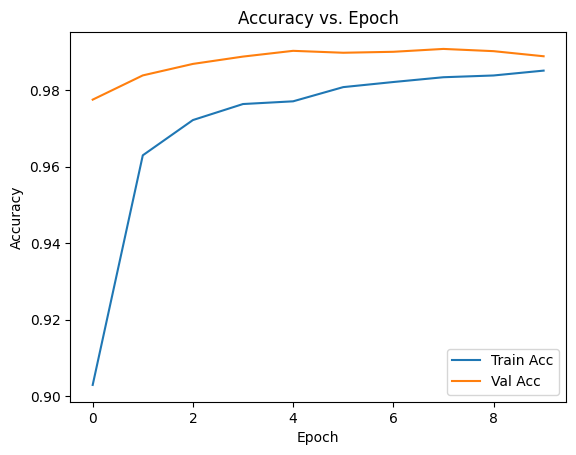

In [ ]:
# CNN Model-1

# CNN Model-1 : trying with best paramters
# (+1 Conv2D layer  , 5x5 kernel  , LeakyReLU, GlobalAveragePooling)

model1 = models.Sequential([
    layers.Conv2D(32, 5, padding='same', activation='leaky_relu',input_shape=(28,28,1)),
    layers.Conv2D(32, 5, padding='same', activation='leaky_relu'),
    layers.AvgPool2D(2),
    layers.Conv2D(64, 5, padding='same', activation='leaky_relu'),
    layers.AvgPool2D(2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax'),
])

model1.summary()

model1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model1.fit(
    x_train, y_train,
    batch_size=64,
    epochs=10,
    validation_split=0.2,
    verbose=2
)

plt.figure()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.legend()
plt.title('Loss vs. Epoch')
plt.show()

plt.figure()
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.legend()
plt.title('Accuracy vs. Epoch')
plt.show()


CNN Model-2

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 64)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │       802,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 803,850 (3.07 MB)

 Trainable params: 803,850 (3.07 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
750/750 - 42s - 55ms/step - accuracy: 0.8555 - loss: 0.4739 - val_accuracy: 0.9512 - val_loss: 0.1589
Epoch 2/10
750/750 - 40s - 53ms/step - accuracy: 0.9187 - loss: 0.2704 - val_accuracy: 0.9617 - val_loss: 0.1303
Epoch 3/10
750/750 - 39s - 52ms/step - accuracy: 0.9353 - loss: 0.2129 - val_accuracy: 0.9713 - val_loss: 0.0991
Epoch 4/10
750/750 - 41s - 54ms/step - accuracy: 0.9451 - loss: 0.1805 - val_accuracy: 0.9747 - val_loss: 0.0880
Epoch 5/10
750/750 - 41s - 55ms/step - accuracy: 0.9499 - loss: 0.1605 - val_accuracy: 0.9753 - val_loss: 0.0821
Epoch 6/10
750/750 - 41s - 54ms/step - accuracy: 0.9551 - loss: 0.1426 - val_accuracy: 0.9748 - val_loss: 0.0852
Epoch 7/10
750/750 - 44s - 58ms/step - accuracy: 0.9578 - loss: 0.1333 - val_accuracy: 0.9766 - val_loss: 0.0833
Epoch 8/10
750/750 - 79s - 105ms/step - accuracy: 0.9595 - loss: 0.1266 - val_accuracy: 0.9782 - val_loss: 0.0784
Epoch 9/10
750/750 - 42s - 56ms/step - accuracy: 0.9618 - loss: 0.1197 - val_accuracy: 0.9783 -

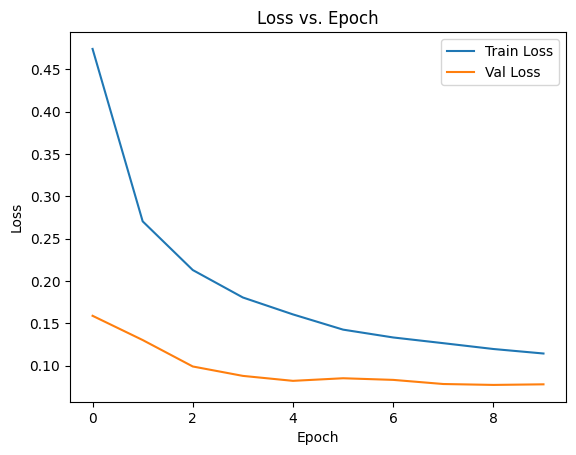

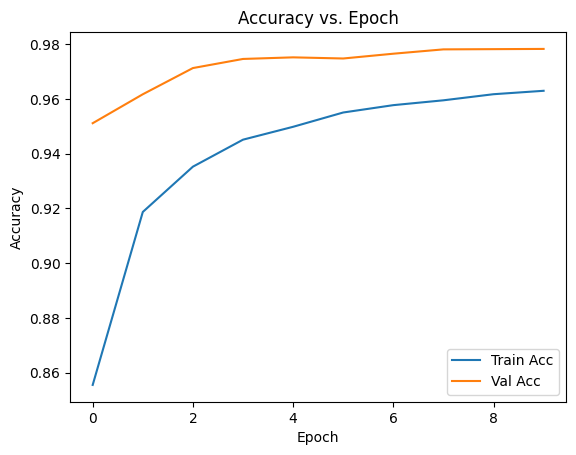

In [ ]:
# CNN Model-2

# CNN Model-2 : trying to understand which hyperparameter gives worse results
# Hyperparamaeters: (-layer , 6x6 or 2x2 kernel, tanh, maxpooling)

model2 = models.Sequential([
    # layers.Conv2D(32, 6, padding='same', activation='tanh',input_shape=(28,28,1)),
    # layers.Conv2D(32, 2, padding='same', activation='tanh'),
    # layers.MaxPool2D(2),
    layers.Conv2D(64, 2, padding='same', activation='tanh', input_shape=(28,28,1)),
    layers.MaxPool2D(2),
    # layers.Conv2D(128, 2, padding='same', activation='tanh'),
    # layers.MaxPool2D(2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax'),
])

model2.summary()

model2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model2.fit(
    x_train, y_train,
    batch_size=64,
    epochs=10,
    validation_split=0.2,
    verbose=2
)

plt.figure()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.legend()
plt.title('Loss vs. Epoch')
plt.show()

plt.figure()
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.legend()
plt.title('Accuracy vs. Epoch')
plt.show()

CNN Model-3

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_40 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_37 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_42 (Conv2D)              │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_38 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_44 (Conv2D)              │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_39 (MaxPooling2D) │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_13 (Flatten)            │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 64)             │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 213,290 (833.16 KB)

 Trainable params: 213,290 (833.16 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
750/750 - 50s - 66ms/step - accuracy: 0.8877 - loss: 0.3490 - val_accuracy: 0.9818 - val_loss: 0.0661
Epoch 2/10
750/750 - 4s - 6ms/step - accuracy: 0.9708 - loss: 0.1008 - val_accuracy: 0.9868 - val_loss: 0.0490
Epoch 3/10
750/750 - 4s - 6ms/step - accuracy: 0.9802 - loss: 0.0716 - val_accuracy: 0.9893 - val_loss: 0.0371
Epoch 4/10
750/750 - 4s - 6ms/step - accuracy: 0.9837 - loss: 0.0560 - val_accuracy: 0.9909 - val_loss: 0.0382
Epoch 5/10
750/750 - 4s - 6ms/step - accuracy: 0.9864 - loss: 0.0469 - val_accuracy: 0.9918 - val_loss: 0.0325
Epoch 6/10
750/750 - 5s - 7ms/step - accuracy: 0.9885 - loss: 0.0389 - val_accuracy: 0.9919 - val_loss: 0.0364
Epoch 7/10
750/750 - 5s - 7ms/step - accuracy: 0.9900 - loss: 0.0338 - val_accuracy: 0.9905 - val_loss: 0.0382
Epoch 8/10
750/750 - 4s - 6ms/step - accuracy: 0.9911 - loss: 0.0296 - val_accuracy: 0.9927 - val_loss: 0.0281
Epoch 9/10
750/750 - 5s - 6ms/step - accuracy: 0.9917 - loss: 0.0273 - val_accuracy: 0.9936 - val_loss: 0.0291

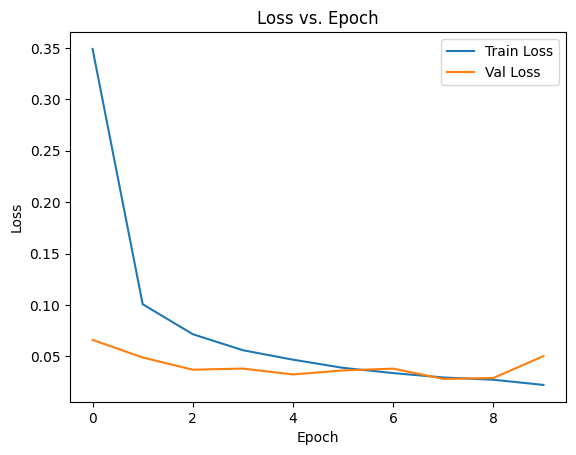

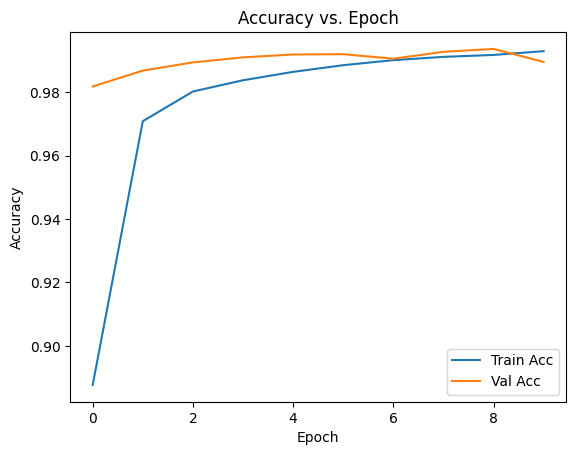

In [ ]:
# Deeper neural networks

model3 = models.Sequential([
    layers.Conv2D(32, 3, padding='same', activation='relu', input_shape=(28,28,1)),
    layers.Conv2D(32, 3, padding='same', activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D(2),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    # layers.MaxPooling2D(2),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(2),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax'), # x(-inf, +inf) -> y(0,inf)
])


model3.summary()

model3.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model3.fit(
    x_train, y_train,
    batch_size=64,
    epochs=10,
    validation_split=0.2,
    verbose=2
)

plt.figure()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.legend()
plt.title('Loss vs. Epoch')
plt.show()

plt.figure()
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.legend()
plt.title('Accuracy vs. Epoch')
plt.show()

Hyperparameter Optimization

In [ ]:
pip install wandb

In [ ]:
import wandb
wandb.login()

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: omergunal84 (omergunal84-hacettepe-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, initializers
import wandb
from wandb.integration.keras import WandbMetricsLogger

# Sweep configuration
sweep_config = {
    'method': 'bayes', # choosing optimum hyperparameters in every sweep
    'metric': {'name': 'val_accuracy', 'goal': 'maximize'},
    'parameters': { # according to q3
        'optimizer': {'values': ['adam', 'sgd']},
        'learning_rate': {'values': [0.01, 0.001, 0.0001]},
        'batch_size': {'values': [32, 64, 128]},
        'dropout_rate': {'values': [0.2, 0.5, 0.7]},
        'init_mode': {'values': ['he_uniform', 'glorot_uniform']},
        'epochs': {'value': 10}
    }
}

sweep_id = wandb.sweep(sweep_config, project="cnn-mnist-optimization")

# Train function compatible with dynamic wandb hyperparameters
def train():
    with wandb.init() as run:
        config = run.config

        (x_train, y_train), _ = tf.keras.datasets.mnist.load_data()
        x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0

        initializer = initializers.get(config.init_mode)

        optimizer = tf.keras.optimizers.get({
            'class_name': config.optimizer,
            'config': {'learning_rate': config.learning_rate}
        })

        # Our model with deeper convolutional layers
        model = models.Sequential([
            layers.Input(shape=(28, 28, 1)),
            layers.Conv2D(32, 3, padding='same', activation='relu', kernel_initializer=initializer),
            layers.Conv2D(32, 3, padding='same', activation='relu', kernel_initializer=initializer),
            layers.MaxPooling2D(2),
            layers.Conv2D(64, 3, padding='same', activation='relu', kernel_initializer=initializer),
            layers.MaxPooling2D(2),
            layers.Flatten(),
            layers.Dense(64, activation='relu', kernel_initializer=initializer),
            layers.Dropout(config.dropout_rate),
            layers.Dense(10, activation='softmax', kernel_initializer=initializer)
        ])

        model.compile(optimizer=optimizer,
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

        model.fit(
            x_train, y_train,
            epochs=config.epochs,
            batch_size=config.batch_size,
            validation_split=0.2,
            verbose=2,
            callbacks=[WandbMetricsLogger()]
        )


wandb.agent(sweep_id, function=train)


Create sweep with ID: dpof9qfz
Sweep URL: https://wandb.ai/omergunal84-hacettepe-university/cnn-mnist-optimization/sweeps/dpof9qfz


wandb: Agent Starting Run: lyquqj6p with config:
wandb: 	batch_size: 32
wandb: 	dropout_rate: 0.2
wandb: 	epochs: 10
wandb: 	init_mode: he_uniform
wandb: 	learning_rate: 0.01
wandb: 	optimizer: adam


Epoch 1/10
1500/1500 - 9s - 6ms/step - accuracy: 0.9380 - loss: 0.2118 - val_accuracy: 0.9751 - val_loss: 0.0873
Epoch 2/10
1500/1500 - 8s - 5ms/step - accuracy: 0.9628 - loss: 0.1282 - val_accuracy: 0.9772 - val_loss: 0.0755
Epoch 3/10
1500/1500 - 10s - 7ms/step - accuracy: 0.9650 - loss: 0.1209 - val_accuracy: 0.9722 - val_loss: 0.0939
Epoch 4/10
1500/1500 - 10s - 6ms/step - accuracy: 0.9671 - loss: 0.1135 - val_accuracy: 0.9756 - val_loss: 0.1021
Epoch 5/10
1500/1500 - 10s - 7ms/step - accuracy: 0.9691 - loss: 0.1109 - val_accuracy: 0.9787 - val_loss: 0.0776
Epoch 6/10
1500/1500 - 11s - 7ms/step - accuracy: 0.9703 - loss: 0.1077 - val_accuracy: 0.9758 - val_loss: 0.0904
Epoch 7/10
1500/1500 - 6s - 4ms/step - accuracy: 0.9712 - loss: 0.1075 - val_accuracy: 0.9772 - val_loss: 0.1057
Epoch 8/10
1500/1500 - 10s - 6ms/step - accuracy: 0.9718 - loss: 0.1038 - val_accuracy: 0.9745 - val_loss: 0.0973
Epoch 9/10
1500/1500 - 6s - 4ms/step - accuracy: 0.9746 - loss: 0.0955 - val_accuracy: 0.98

epoch/accuracy,▁▆▆▇▇▇▇▇██
epoch/epoch,▁▂▃▃▄▅▆▆▇█
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▃▃▂▂▂▂▂▁▂
epoch/val_accuracy,▃▄▁▃▅▃▄▂█▃
epoch/val_loss,▄▁▅▇▁▄█▆▅▇
epoch/accuracy,0.97254
epoch/epoch,9
epoch/learning_rate,0.01
epoch/loss,0.10477
epoch/val_accuracy,0.97483


wandb: Agent Starting Run: 8uz7q3lx with config:
wandb: 	batch_size: 64
wandb: 	dropout_rate: 0.5
wandb: 	epochs: 10
wandb: 	init_mode: glorot_uniform
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: sgd


Epoch 1/10
750/750 - 5s - 7ms/step - accuracy: 0.0949 - loss: 2.3052 - val_accuracy: 0.0794 - val_loss: 2.3000
Epoch 2/10
750/750 - 3s - 5ms/step - accuracy: 0.1076 - loss: 2.2968 - val_accuracy: 0.0972 - val_loss: 2.2919
Epoch 3/10
750/750 - 5s - 6ms/step - accuracy: 0.1283 - loss: 2.2889 - val_accuracy: 0.1225 - val_loss: 2.2841
Epoch 4/10
750/750 - 5s - 7ms/step - accuracy: 0.1531 - loss: 2.2810 - val_accuracy: 0.1616 - val_loss: 2.2768
Epoch 5/10
750/750 - 4s - 5ms/step - accuracy: 0.1686 - loss: 2.2747 - val_accuracy: 0.2104 - val_loss: 2.2698
Epoch 6/10
750/750 - 5s - 7ms/step - accuracy: 0.1932 - loss: 2.2678 - val_accuracy: 0.2717 - val_loss: 2.2626
Epoch 7/10
750/750 - 3s - 4ms/step - accuracy: 0.2082 - loss: 2.2613 - val_accuracy: 0.3239 - val_loss: 2.2551
Epoch 8/10
750/750 - 6s - 7ms/step - accuracy: 0.2229 - loss: 2.2539 - val_accuracy: 0.3736 - val_loss: 2.2469
Epoch 9/10
750/750 - 3s - 4ms/step - accuracy: 0.2397 - loss: 2.2453 - val_accuracy: 0.4092 - val_loss: 2.2378
E

epoch/accuracy,▁▂▂▄▄▅▆▇▇█
epoch/epoch,▁▂▃▃▄▅▆▆▇█
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▇▆▆▅▄▄▃▂▁
epoch/val_accuracy,▁▁▂▃▄▅▆▇▇█
epoch/val_loss,█▇▆▆▅▄▄▃▂▁
epoch/accuracy,0.25648
epoch/epoch,9
epoch/learning_rate,0.0001
epoch/loss,2.2364
epoch/val_accuracy,0.43875


wandb: Agent Starting Run: zn3svxmr with config:
wandb: 	batch_size: 128
wandb: 	dropout_rate: 0.2
wandb: 	epochs: 10
wandb: 	init_mode: glorot_uniform
wandb: 	learning_rate: 0.01
wandb: 	optimizer: adam


Epoch 1/10
375/375 - 7s - 18ms/step - accuracy: 0.9399 - loss: 0.1914 - val_accuracy: 0.9823 - val_loss: 0.0559
Epoch 2/10
375/375 - 2s - 6ms/step - accuracy: 0.9774 - loss: 0.0789 - val_accuracy: 0.9864 - val_loss: 0.0448
Epoch 3/10
375/375 - 3s - 7ms/step - accuracy: 0.9817 - loss: 0.0600 - val_accuracy: 0.9838 - val_loss: 0.0552
Epoch 4/10
375/375 - 3s - 7ms/step - accuracy: 0.9837 - loss: 0.0547 - val_accuracy: 0.9835 - val_loss: 0.0550
Epoch 5/10
375/375 - 3s - 8ms/step - accuracy: 0.9838 - loss: 0.0566 - val_accuracy: 0.9845 - val_loss: 0.0525
Epoch 6/10
375/375 - 2s - 7ms/step - accuracy: 0.9845 - loss: 0.0491 - val_accuracy: 0.9866 - val_loss: 0.0533
Epoch 7/10
375/375 - 2s - 7ms/step - accuracy: 0.9872 - loss: 0.0447 - val_accuracy: 0.9886 - val_loss: 0.0479
Epoch 8/10
375/375 - 2s - 6ms/step - accuracy: 0.9860 - loss: 0.0451 - val_accuracy: 0.9812 - val_loss: 0.0826
Epoch 9/10
375/375 - 3s - 8ms/step - accuracy: 0.9848 - loss: 0.0516 - val_accuracy: 0.9826 - val_loss: 0.0836


epoch/accuracy,▁▇▇▇▇█████
epoch/epoch,▁▂▃▃▄▅▆▆▇█
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▃▂▁▂▁▁▁▁▁
epoch/val_accuracy,▂▆▃▃▄▆█▁▂▇
epoch/val_loss,▃▁▃▃▂▃▂██▅
epoch/accuracy,0.9869
epoch/epoch,9
epoch/learning_rate,0.01
epoch/loss,0.04492
epoch/val_accuracy,0.98758


wandb: Agent Starting Run: 47gbtgxf with config:
wandb: 	batch_size: 128
wandb: 	dropout_rate: 0.2
wandb: 	epochs: 10
wandb: 	init_mode: he_uniform
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: sgd


Epoch 1/10
375/375 - 6s - 15ms/step - accuracy: 0.1154 - loss: 2.3457 - val_accuracy: 0.1783 - val_loss: 2.2199
Epoch 2/10
375/375 - 8s - 21ms/step - accuracy: 0.1865 - loss: 2.1902 - val_accuracy: 0.2968 - val_loss: 2.1070
Epoch 3/10
375/375 - 5s - 13ms/step - accuracy: 0.2698 - loss: 2.0855 - val_accuracy: 0.3976 - val_loss: 2.0020
Epoch 4/10
375/375 - 2s - 7ms/step - accuracy: 0.3413 - loss: 1.9867 - val_accuracy: 0.4842 - val_loss: 1.8933
Epoch 5/10
375/375 - 3s - 7ms/step - accuracy: 0.4104 - loss: 1.8819 - val_accuracy: 0.5551 - val_loss: 1.7758
Epoch 6/10
375/375 - 3s - 7ms/step - accuracy: 0.4638 - loss: 1.7715 - val_accuracy: 0.6221 - val_loss: 1.6503
Epoch 7/10
375/375 - 2s - 6ms/step - accuracy: 0.5107 - loss: 1.6581 - val_accuracy: 0.6727 - val_loss: 1.5216
Epoch 8/10
375/375 - 2s - 7ms/step - accuracy: 0.5519 - loss: 1.5436 - val_accuracy: 0.7078 - val_loss: 1.3939
Epoch 9/10
375/375 - 3s - 7ms/step - accuracy: 0.5872 - loss: 1.4369 - val_accuracy: 0.7353 - val_loss: 1.272

epoch/accuracy,▁▂▃▄▅▆▇▇██
epoch/epoch,▁▂▃▃▄▅▆▆▇█
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▇▆▆▅▄▃▂▂▁
epoch/val_accuracy,▁▂▄▅▆▆▇▇██
epoch/val_loss,█▇▇▆▅▄▃▃▂▁
epoch/accuracy,0.61477
epoch/epoch,9
epoch/learning_rate,0.0001
epoch/loss,1.33765
epoch/val_accuracy,0.7595


wandb: Agent Starting Run: zu9r7ssk with config:
wandb: 	batch_size: 32
wandb: 	dropout_rate: 0.5
wandb: 	epochs: 10
wandb: 	init_mode: he_uniform
wandb: 	learning_rate: 0.001
wandb: 	optimizer: sgd


Epoch 1/10
1500/1500 - 7s - 5ms/step - accuracy: 0.6685 - loss: 1.0171 - val_accuracy: 0.9225 - val_loss: 0.3106
Epoch 2/10
1500/1500 - 9s - 6ms/step - accuracy: 0.8446 - loss: 0.5140 - val_accuracy: 0.9433 - val_loss: 0.2098
Epoch 3/10
1500/1500 - 8s - 5ms/step - accuracy: 0.8792 - loss: 0.4003 - val_accuracy: 0.9522 - val_loss: 0.1704
Epoch 4/10
1500/1500 - 8s - 5ms/step - accuracy: 0.8998 - loss: 0.3379 - val_accuracy: 0.9601 - val_loss: 0.1422
Epoch 5/10
1500/1500 - 10s - 7ms/step - accuracy: 0.9107 - loss: 0.2994 - val_accuracy: 0.9654 - val_loss: 0.1260
Epoch 6/10
1500/1500 - 10s - 7ms/step - accuracy: 0.9214 - loss: 0.2684 - val_accuracy: 0.9685 - val_loss: 0.1147
Epoch 7/10
1500/1500 - 10s - 7ms/step - accuracy: 0.9267 - loss: 0.2462 - val_accuracy: 0.9708 - val_loss: 0.1074
Epoch 8/10
1500/1500 - 5s - 3ms/step - accuracy: 0.9321 - loss: 0.2332 - val_accuracy: 0.9717 - val_loss: 0.0999
Epoch 9/10
1500/1500 - 5s - 4ms/step - accuracy: 0.9364 - loss: 0.2159 - val_accuracy: 0.9737

epoch/accuracy,▁▆▆▇▇█████
epoch/epoch,▁▂▃▃▄▅▆▆▇█
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▄▃▂▂▂▁▁▁▁
epoch/val_accuracy,▁▄▅▆▇▇████
epoch/val_loss,█▅▄▃▂▂▂▁▁▁
epoch/accuracy,0.94033
epoch/epoch,9
epoch/learning_rate,0.001
epoch/loss,0.20606
epoch/val_accuracy,0.9745


wandb: Agent Starting Run: lfx5mhg0 with config:
wandb: 	batch_size: 32
wandb: 	dropout_rate: 0.5
wandb: 	epochs: 10
wandb: 	init_mode: he_uniform
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: sgd


Epoch 1/10
1500/1500 - 7s - 5ms/step - accuracy: 0.2477 - loss: 2.1389 - val_accuracy: 0.5585 - val_loss: 1.8369
Epoch 2/10
1500/1500 - 9s - 6ms/step - accuracy: 0.4285 - loss: 1.7811 - val_accuracy: 0.6795 - val_loss: 1.4589
Epoch 3/10
1500/1500 - 10s - 6ms/step - accuracy: 0.5270 - loss: 1.5069 - val_accuracy: 0.7663 - val_loss: 1.1331
Epoch 4/10
1500/1500 - 5s - 3ms/step - accuracy: 0.5954 - loss: 1.2843 - val_accuracy: 0.8141 - val_loss: 0.9033
Epoch 5/10
1500/1500 - 5s - 4ms/step - accuracy: 0.6490 - loss: 1.1146 - val_accuracy: 0.8425 - val_loss: 0.7375
Epoch 6/10
1500/1500 - 11s - 7ms/step - accuracy: 0.6863 - loss: 0.9974 - val_accuracy: 0.8646 - val_loss: 0.6230
Epoch 7/10
1500/1500 - 5s - 3ms/step - accuracy: 0.7207 - loss: 0.8955 - val_accuracy: 0.8798 - val_loss: 0.5348
Epoch 8/10
1500/1500 - 5s - 3ms/step - accuracy: 0.7430 - loss: 0.8221 - val_accuracy: 0.8888 - val_loss: 0.4759
Epoch 9/10
1500/1500 - 7s - 4ms/step - accuracy: 0.7609 - loss: 0.7631 - val_accuracy: 0.8992 

epoch/accuracy,▁▃▅▆▆▇▇███
epoch/epoch,▁▂▃▃▄▅▆▆▇█
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▆▅▄▃▂▂▂▁▁
epoch/val_accuracy,▁▃▅▆▇▇▇███
epoch/val_loss,█▆▅▃▃▂▂▁▁▁
epoch/accuracy,0.77646
epoch/epoch,9
epoch/learning_rate,0.0001
epoch/loss,0.71371
epoch/val_accuracy,0.906


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 8g0kg30d with config:
wandb: 	batch_size: 128
wandb: 	dropout_rate: 0.3
wandb: 	epochs: 10
wandb: 	init_mode: he_uniform
wandb: 	learning_rate: 0.01
wandb: 	optimizer: sgd


Epoch 1/10
375/375 - 5s - 14ms/step - accuracy: 0.7628 - loss: 0.7443 - val_accuracy: 0.9367 - val_loss: 0.2217
Epoch 2/10
375/375 - 3s - 7ms/step - accuracy: 0.9101 - loss: 0.3034 - val_accuracy: 0.9600 - val_loss: 0.1432
Epoch 3/10
375/375 - 5s - 13ms/step - accuracy: 0.9372 - loss: 0.2140 - val_accuracy: 0.9698 - val_loss: 0.1067
Epoch 4/10
375/375 - 5s - 15ms/step - accuracy: 0.9485 - loss: 0.1713 - val_accuracy: 0.9747 - val_loss: 0.0904
Epoch 5/10
375/375 - 5s - 13ms/step - accuracy: 0.9575 - loss: 0.1452 - val_accuracy: 0.9764 - val_loss: 0.0824
Epoch 6/10
375/375 - 2s - 7ms/step - accuracy: 0.9624 - loss: 0.1257 - val_accuracy: 0.9783 - val_loss: 0.0739
Epoch 7/10
375/375 - 3s - 7ms/step - accuracy: 0.9667 - loss: 0.1152 - val_accuracy: 0.9802 - val_loss: 0.0675
Epoch 8/10
375/375 - 3s - 9ms/step - accuracy: 0.9685 - loss: 0.1039 - val_accuracy: 0.9786 - val_loss: 0.0709
Epoch 9/10
375/375 - 4s - 12ms/step - accuracy: 0.9706 - loss: 0.0978 - val_accuracy: 0.9817 - val_loss: 0.0

epoch/accuracy,▁▆▇▇▇█████
epoch/epoch,▁▂▃▃▄▅▆▆▇█
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▃▂▂▂▁▁▁▁▁
epoch/val_accuracy,▁▅▆▇▇▇█▇██
epoch/val_loss,█▅▃▂▂▂▁▁▁▁
epoch/accuracy,0.97373
epoch/epoch,9
epoch/learning_rate,0.01
epoch/loss,0.08919
epoch/val_accuracy,0.98267


wandb: Agent Starting Run: ifre87cl with config:
wandb: 	batch_size: 32
wandb: 	dropout_rate: 0.2
wandb: 	epochs: 10
wandb: 	init_mode: glorot_uniform
wandb: 	learning_rate: 0.01
wandb: 	optimizer: sgd


Epoch 1/10
1500/1500 - 8s - 5ms/step - accuracy: 0.7823 - loss: 0.6700 - val_accuracy: 0.9580 - val_loss: 0.1452
Epoch 2/10
1500/1500 - 6s - 4ms/step - accuracy: 0.9496 - loss: 0.1660 - val_accuracy: 0.9718 - val_loss: 0.0971
Epoch 3/10
1500/1500 - 11s - 7ms/step - accuracy: 0.9652 - loss: 0.1173 - val_accuracy: 0.9753 - val_loss: 0.0801
Epoch 4/10
1500/1500 - 5s - 4ms/step - accuracy: 0.9716 - loss: 0.0941 - val_accuracy: 0.9777 - val_loss: 0.0704
Epoch 5/10
1500/1500 - 10s - 7ms/step - accuracy: 0.9751 - loss: 0.0816 - val_accuracy: 0.9804 - val_loss: 0.0669
Epoch 6/10
1500/1500 - 5s - 3ms/step - accuracy: 0.9777 - loss: 0.0724 - val_accuracy: 0.9837 - val_loss: 0.0557
Epoch 7/10
1500/1500 - 6s - 4ms/step - accuracy: 0.9801 - loss: 0.0643 - val_accuracy: 0.9854 - val_loss: 0.0524
Epoch 8/10
1500/1500 - 11s - 7ms/step - accuracy: 0.9813 - loss: 0.0597 - val_accuracy: 0.9850 - val_loss: 0.0523
Epoch 9/10
1500/1500 - 10s - 6ms/step - accuracy: 0.9832 - loss: 0.0532 - val_accuracy: 0.985

epoch/accuracy,▁▇▇███████
epoch/epoch,▁▂▃▃▄▅▆▆▇█
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▂▂▂▁▁▁▁▁▁
epoch/val_accuracy,▁▅▅▆▇████▇
epoch/val_loss,█▄▃▂▂▁▁▁▁▁
epoch/accuracy,0.98392
epoch/epoch,9
epoch/learning_rate,0.01
epoch/loss,0.0486
epoch/val_accuracy,0.98325


wandb: Agent Starting Run: tu2uebsf with config:
wandb: 	batch_size: 32
wandb: 	dropout_rate: 0.5
wandb: 	epochs: 10
wandb: 	init_mode: he_uniform
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: sgd


Epoch 1/10
1500/1500 - 7s - 4ms/step - accuracy: 0.2715 - loss: 2.0444 - val_accuracy: 0.6692 - val_loss: 1.5508
Epoch 2/10
1500/1500 - 9s - 6ms/step - accuracy: 0.4949 - loss: 1.5080 - val_accuracy: 0.8054 - val_loss: 1.0503
Epoch 3/10
1500/1500 - 5s - 3ms/step - accuracy: 0.6000 - loss: 1.2117 - val_accuracy: 0.8543 - val_loss: 0.7783
Epoch 4/10
1500/1500 - 6s - 4ms/step - accuracy: 0.6605 - loss: 1.0355 - val_accuracy: 0.8761 - val_loss: 0.6251
Epoch 5/10
1500/1500 - 5s - 4ms/step - accuracy: 0.6990 - loss: 0.9214 - val_accuracy: 0.8890 - val_loss: 0.5231
Epoch 6/10
1500/1500 - 10s - 7ms/step - accuracy: 0.7271 - loss: 0.8378 - val_accuracy: 0.8958 - val_loss: 0.4571
Epoch 7/10
1500/1500 - 6s - 4ms/step - accuracy: 0.7530 - loss: 0.7703 - val_accuracy: 0.9043 - val_loss: 0.4070
Epoch 8/10
1500/1500 - 9s - 6ms/step - accuracy: 0.7732 - loss: 0.7096 - val_accuracy: 0.9111 - val_loss: 0.3695
Epoch 9/10
1500/1500 - 5s - 4ms/step - accuracy: 0.7876 - loss: 0.6708 - val_accuracy: 0.9172 -

epoch/accuracy,▁▄▅▆▇▇▇███
epoch/epoch,▁▂▃▃▄▅▆▆▇█
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▅▄▃▂▂▂▁▁▁
epoch/val_accuracy,▁▅▆▇▇▇████
epoch/val_loss,█▅▄▃▂▂▂▁▁▁
epoch/accuracy,0.79956
epoch/epoch,9
epoch/learning_rate,0.0001
epoch/loss,0.63776
epoch/val_accuracy,0.92058


wandb: Agent Starting Run: bs6iosyq with config:
wandb: 	batch_size: 128
wandb: 	dropout_rate: 0.3
wandb: 	epochs: 10
wandb: 	init_mode: glorot_uniform
wandb: 	learning_rate: 0.01
wandb: 	optimizer: adam


Epoch 1/10
375/375 - 7s - 18ms/step - accuracy: 0.8513 - loss: 0.4413 - val_accuracy: 0.9779 - val_loss: 0.0739
Epoch 2/10
375/375 - 3s - 7ms/step - accuracy: 0.9612 - loss: 0.1286 - val_accuracy: 0.9802 - val_loss: 0.0673
Epoch 3/10
375/375 - 2s - 7ms/step - accuracy: 0.9671 - loss: 0.1094 - val_accuracy: 0.9845 - val_loss: 0.0542
Epoch 4/10
375/375 - 3s - 7ms/step - accuracy: 0.9704 - loss: 0.0967 - val_accuracy: 0.9843 - val_loss: 0.0550
Epoch 5/10
375/375 - 3s - 7ms/step - accuracy: 0.9740 - loss: 0.0866 - val_accuracy: 0.9862 - val_loss: 0.0599
Epoch 6/10
375/375 - 3s - 7ms/step - accuracy: 0.9736 - loss: 0.0843 - val_accuracy: 0.9852 - val_loss: 0.0571
Epoch 7/10
375/375 - 2s - 7ms/step - accuracy: 0.9745 - loss: 0.0811 - val_accuracy: 0.9856 - val_loss: 0.0578
Epoch 8/10
375/375 - 3s - 7ms/step - accuracy: 0.9734 - loss: 0.0827 - val_accuracy: 0.9864 - val_loss: 0.0550
Epoch 9/10
375/375 - 3s - 7ms/step - accuracy: 0.9769 - loss: 0.0746 - val_accuracy: 0.9852 - val_loss: 0.0574


epoch/accuracy,▁▇▇███████
epoch/epoch,▁▂▃▃▄▅▆▆▇█
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▂▂▁▁▁▁▁▁▁
epoch/val_accuracy,▁▃▆▆▇▆▇▇▆█
epoch/val_loss,█▆▃▃▄▄▄▃▄▁
epoch/accuracy,0.97817
epoch/epoch,9
epoch/learning_rate,0.01
epoch/loss,0.07073
epoch/val_accuracy,0.98758


wandb: Agent Starting Run: dvytv4mz with config:
wandb: 	batch_size: 64
wandb: 	dropout_rate: 0.3
wandb: 	epochs: 10
wandb: 	init_mode: glorot_uniform
wandb: 	learning_rate: 0.001
wandb: 	optimizer: sgd


Epoch 1/10
750/750 - 6s - 8ms/step - accuracy: 0.1781 - loss: 2.2840 - val_accuracy: 0.3495 - val_loss: 2.2571
Epoch 2/10
750/750 - 8s - 11ms/step - accuracy: 0.3524 - loss: 2.1990 - val_accuracy: 0.6145 - val_loss: 2.0732
Epoch 3/10
750/750 - 6s - 8ms/step - accuracy: 0.5500 - loss: 1.6667 - val_accuracy: 0.8016 - val_loss: 0.9567
Epoch 4/10
750/750 - 5s - 6ms/step - accuracy: 0.7376 - loss: 0.8648 - val_accuracy: 0.8784 - val_loss: 0.4823
Epoch 5/10
750/750 - 5s - 6ms/step - accuracy: 0.8149 - loss: 0.6073 - val_accuracy: 0.9042 - val_loss: 0.3566
Epoch 6/10
750/750 - 4s - 5ms/step - accuracy: 0.8495 - loss: 0.4948 - val_accuracy: 0.9165 - val_loss: 0.2961
Epoch 7/10
750/750 - 5s - 6ms/step - accuracy: 0.8701 - loss: 0.4317 - val_accuracy: 0.9258 - val_loss: 0.2615
Epoch 8/10
750/750 - 3s - 4ms/step - accuracy: 0.8820 - loss: 0.3893 - val_accuracy: 0.9328 - val_loss: 0.2368
Epoch 9/10
750/750 - 6s - 7ms/step - accuracy: 0.8939 - loss: 0.3539 - val_accuracy: 0.9371 - val_loss: 0.2180


epoch/accuracy,▁▃▅▆▇▇████
epoch/epoch,▁▂▃▃▄▅▆▆▇█
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁
epoch/loss,██▆▃▂▂▁▁▁▁
epoch/val_accuracy,▁▄▆▇██████
epoch/val_loss,█▇▄▂▂▁▁▁▁▁
epoch/accuracy,0.90129
epoch/epoch,9
epoch/learning_rate,0.001
epoch/loss,0.33054
epoch/val_accuracy,0.93908


wandb: Agent Starting Run: urn65jra with config:
wandb: 	batch_size: 32
wandb: 	dropout_rate: 0.3
wandb: 	epochs: 10
wandb: 	init_mode: glorot_uniform
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: sgd


Epoch 1/10
1500/1500 - 7s - 5ms/step - accuracy: 0.1239 - loss: 2.2975 - val_accuracy: 0.1752 - val_loss: 2.2922
Epoch 2/10
1500/1500 - 9s - 6ms/step - accuracy: 0.1721 - loss: 2.2876 - val_accuracy: 0.2399 - val_loss: 2.2822
Epoch 3/10
1500/1500 - 5s - 3ms/step - accuracy: 0.2134 - loss: 2.2778 - val_accuracy: 0.2906 - val_loss: 2.2714
Epoch 4/10
1500/1500 - 6s - 4ms/step - accuracy: 0.2552 - loss: 2.2663 - val_accuracy: 0.3501 - val_loss: 2.2581
Epoch 5/10
1500/1500 - 5s - 4ms/step - accuracy: 0.2875 - loss: 2.2517 - val_accuracy: 0.3949 - val_loss: 2.2399
Epoch 6/10
1500/1500 - 11s - 7ms/step - accuracy: 0.3235 - loss: 2.2313 - val_accuracy: 0.4256 - val_loss: 2.2145
Epoch 7/10
1500/1500 - 5s - 3ms/step - accuracy: 0.3489 - loss: 2.2019 - val_accuracy: 0.4596 - val_loss: 2.1779
Epoch 8/10
1500/1500 - 6s - 4ms/step - accuracy: 0.3769 - loss: 2.1596 - val_accuracy: 0.4996 - val_loss: 2.1231
Epoch 9/10
1500/1500 - 10s - 7ms/step - accuracy: 0.4134 - loss: 2.0960 - val_accuracy: 0.5452 

epoch/accuracy,▁▂▃▄▅▅▆▆▇█
epoch/epoch,▁▂▃▃▄▅▆▆▇█
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁
epoch/loss,███▇▇▆▆▅▃▁
epoch/val_accuracy,▁▂▃▄▅▅▆▆▇█
epoch/val_loss,███▇▇▇▆▅▃▁
epoch/accuracy,0.44998
epoch/epoch,9
epoch/learning_rate,0.0001
epoch/loss,1.99482
epoch/val_accuracy,0.59392


wandb: Agent Starting Run: 3oqezwax with config:
wandb: 	batch_size: 128
wandb: 	dropout_rate: 0.5
wandb: 	epochs: 10
wandb: 	init_mode: glorot_uniform
wandb: 	learning_rate: 0.01
wandb: 	optimizer: adam


Epoch 1/10
375/375 - 6s - 17ms/step - accuracy: 0.8859 - loss: 0.3558 - val_accuracy: 0.9775 - val_loss: 0.0703
Epoch 2/10
375/375 - 7s - 20ms/step - accuracy: 0.9490 - loss: 0.1641 - val_accuracy: 0.9817 - val_loss: 0.0708
Epoch 3/10
375/375 - 6s - 15ms/step - accuracy: 0.9563 - loss: 0.1393 - val_accuracy: 0.9840 - val_loss: 0.0641
Epoch 4/10
375/375 - 2s - 7ms/step - accuracy: 0.9600 - loss: 0.1297 - val_accuracy: 0.9861 - val_loss: 0.0494
Epoch 5/10
375/375 - 2s - 7ms/step - accuracy: 0.9627 - loss: 0.1193 - val_accuracy: 0.9868 - val_loss: 0.0534
Epoch 6/10
375/375 - 2s - 6ms/step - accuracy: 0.9633 - loss: 0.1206 - val_accuracy: 0.9869 - val_loss: 0.0568
Epoch 7/10
375/375 - 3s - 7ms/step - accuracy: 0.9675 - loss: 0.1044 - val_accuracy: 0.9872 - val_loss: 0.0538
Epoch 8/10
375/375 - 3s - 7ms/step - accuracy: 0.9675 - loss: 0.1039 - val_accuracy: 0.9862 - val_loss: 0.0530
Epoch 9/10
375/375 - 5s - 13ms/step - accuracy: 0.9705 - loss: 0.0957 - val_accuracy: 0.9875 - val_loss: 0.05

epoch/accuracy,▁▆▇▇▇▇████
epoch/epoch,▁▂▃▃▄▅▆▆▇█
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▃▂▂▂▂▁▁▁▁
epoch/val_accuracy,▁▄▆▇▇██▇██
epoch/val_loss,██▆▁▂▃▂▂▃▂
epoch/accuracy,0.96667
epoch/epoch,9
epoch/learning_rate,0.01
epoch/loss,0.10544
epoch/val_accuracy,0.987


wandb: Agent Starting Run: 9ehf5svk with config:
wandb: 	batch_size: 64
wandb: 	dropout_rate: 0.3
wandb: 	epochs: 10
wandb: 	init_mode: glorot_uniform
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam


Epoch 1/10
750/750 - 7s - 9ms/step - accuracy: 0.9220 - loss: 0.2497 - val_accuracy: 0.9801 - val_loss: 0.0652
Epoch 2/10
750/750 - 4s - 5ms/step - accuracy: 0.9767 - loss: 0.0760 - val_accuracy: 0.9883 - val_loss: 0.0392
Epoch 3/10
750/750 - 5s - 7ms/step - accuracy: 0.9836 - loss: 0.0537 - val_accuracy: 0.9877 - val_loss: 0.0394
Epoch 4/10
750/750 - 5s - 7ms/step - accuracy: 0.9868 - loss: 0.0451 - val_accuracy: 0.9897 - val_loss: 0.0347
Epoch 5/10
750/750 - 4s - 5ms/step - accuracy: 0.9890 - loss: 0.0356 - val_accuracy: 0.9892 - val_loss: 0.0376
Epoch 6/10
750/750 - 5s - 7ms/step - accuracy: 0.9906 - loss: 0.0299 - val_accuracy: 0.9898 - val_loss: 0.0364
Epoch 7/10
750/750 - 3s - 5ms/step - accuracy: 0.9921 - loss: 0.0264 - val_accuracy: 0.9901 - val_loss: 0.0412
Epoch 8/10
750/750 - 6s - 7ms/step - accuracy: 0.9926 - loss: 0.0238 - val_accuracy: 0.9901 - val_loss: 0.0408
Epoch 9/10
750/750 - 3s - 4ms/step - accuracy: 0.9933 - loss: 0.0209 - val_accuracy: 0.9906 - val_loss: 0.0379
E

epoch/accuracy,▁▆▇▇██████
epoch/epoch,▁▂▃▃▄▅▆▆▇█
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▃▂▂▂▁▁▁▁▁
epoch/val_accuracy,▁▆▅▇▆▇▇▇▇█
epoch/val_loss,█▃▃▂▂▂▃▃▂▁
epoch/accuracy,0.99385
epoch/epoch,9
epoch/learning_rate,0.001
epoch/loss,0.0187
epoch/val_accuracy,0.99225


wandb: Agent Starting Run: n6tcm1o0 with config:
wandb: 	batch_size: 64
wandb: 	dropout_rate: 0.3
wandb: 	epochs: 10
wandb: 	init_mode: glorot_uniform
wandb: 	learning_rate: 0.01
wandb: 	optimizer: sgd


Epoch 1/10
750/750 - 5s - 7ms/step - accuracy: 0.6718 - loss: 1.0032 - val_accuracy: 0.9293 - val_loss: 0.2449
Epoch 2/10
750/750 - 3s - 4ms/step - accuracy: 0.9105 - loss: 0.2982 - val_accuracy: 0.9564 - val_loss: 0.1454
Epoch 3/10
750/750 - 5s - 7ms/step - accuracy: 0.9396 - loss: 0.1988 - val_accuracy: 0.9652 - val_loss: 0.1150
Epoch 4/10
750/750 - 3s - 4ms/step - accuracy: 0.9522 - loss: 0.1587 - val_accuracy: 0.9695 - val_loss: 0.0993
Epoch 5/10
750/750 - 3s - 4ms/step - accuracy: 0.9593 - loss: 0.1378 - val_accuracy: 0.9745 - val_loss: 0.0866
Epoch 6/10
750/750 - 3s - 5ms/step - accuracy: 0.9644 - loss: 0.1180 - val_accuracy: 0.9765 - val_loss: 0.0738
Epoch 7/10
750/750 - 3s - 4ms/step - accuracy: 0.9665 - loss: 0.1086 - val_accuracy: 0.9792 - val_loss: 0.0702
Epoch 8/10
750/750 - 3s - 4ms/step - accuracy: 0.9695 - loss: 0.0990 - val_accuracy: 0.9782 - val_loss: 0.0692
Epoch 9/10
750/750 - 6s - 7ms/step - accuracy: 0.9720 - loss: 0.0917 - val_accuracy: 0.9812 - val_loss: 0.0624
E

epoch/accuracy,▁▇▇▇██████
epoch/epoch,▁▂▃▃▄▅▆▆▇█
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▃▂▂▁▁▁▁▁▁
epoch/val_accuracy,▁▅▆▆▇▇████
epoch/val_loss,█▄▃▂▂▁▁▁▁▁
epoch/accuracy,0.97394
epoch/epoch,9
epoch/learning_rate,0.01
epoch/loss,0.08588
epoch/val_accuracy,0.98025


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: r0o5hfpf with config:
wandb: 	batch_size: 32
wandb: 	dropout_rate: 0.5
wandb: 	epochs: 10
wandb: 	init_mode: he_uniform
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: sgd


Epoch 1/10
1500/1500 - 8s - 5ms/step - accuracy: 0.2982 - loss: 2.0388 - val_accuracy: 0.6302 - val_loss: 1.6008
Epoch 2/10
1500/1500 - 5s - 3ms/step - accuracy: 0.5003 - loss: 1.5460 - val_accuracy: 0.7781 - val_loss: 1.0863
Epoch 3/10
1500/1500 - 6s - 4ms/step - accuracy: 0.6083 - loss: 1.2194 - val_accuracy: 0.8415 - val_loss: 0.7801
Epoch 4/10
1500/1500 - 5s - 4ms/step - accuracy: 0.6747 - loss: 1.0165 - val_accuracy: 0.8706 - val_loss: 0.6169
Epoch 5/10
1500/1500 - 10s - 7ms/step - accuracy: 0.7191 - loss: 0.8905 - val_accuracy: 0.8871 - val_loss: 0.5103
Epoch 6/10
1500/1500 - 5s - 3ms/step - accuracy: 0.7511 - loss: 0.8012 - val_accuracy: 0.8994 - val_loss: 0.4395
Epoch 7/10
1500/1500 - 6s - 4ms/step - accuracy: 0.7704 - loss: 0.7326 - val_accuracy: 0.9054 - val_loss: 0.3929
Epoch 8/10
1500/1500 - 5s - 3ms/step - accuracy: 0.7892 - loss: 0.6790 - val_accuracy: 0.9110 - val_loss: 0.3583
Epoch 9/10
1500/1500 - 6s - 4ms/step - accuracy: 0.8007 - loss: 0.6388 - val_accuracy: 0.9147 -

epoch/accuracy,▁▄▅▆▇▇▇███
epoch/epoch,▁▂▃▃▄▅▆▆▇█
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▆▄▃▂▂▂▁▁▁
epoch/val_accuracy,▁▅▆▇▇█████
epoch/val_loss,█▅▄▃▂▂▁▁▁▁
epoch/accuracy,0.81427
epoch/epoch,9
epoch/learning_rate,0.0001
epoch/loss,0.60752
epoch/val_accuracy,0.92


wandb: Agent Starting Run: l411gryf with config:
wandb: 	batch_size: 64
wandb: 	dropout_rate: 0.3
wandb: 	epochs: 10
wandb: 	init_mode: glorot_uniform
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: adam


Epoch 1/10
750/750 - 7s - 9ms/step - accuracy: 0.7901 - loss: 0.6714 - val_accuracy: 0.9507 - val_loss: 0.1678
Epoch 2/10
750/750 - 8s - 10ms/step - accuracy: 0.9359 - loss: 0.2157 - val_accuracy: 0.9653 - val_loss: 0.1156
Epoch 3/10
750/750 - 4s - 5ms/step - accuracy: 0.9541 - loss: 0.1544 - val_accuracy: 0.9741 - val_loss: 0.0867
Epoch 4/10
750/750 - 5s - 6ms/step - accuracy: 0.9632 - loss: 0.1204 - val_accuracy: 0.9787 - val_loss: 0.0693
Epoch 5/10
750/750 - 3s - 5ms/step - accuracy: 0.9694 - loss: 0.1020 - val_accuracy: 0.9808 - val_loss: 0.0648
Epoch 6/10
750/750 - 5s - 7ms/step - accuracy: 0.9725 - loss: 0.0906 - val_accuracy: 0.9828 - val_loss: 0.0567
Epoch 7/10
750/750 - 3s - 4ms/step - accuracy: 0.9753 - loss: 0.0806 - val_accuracy: 0.9839 - val_loss: 0.0530
Epoch 8/10
750/750 - 3s - 4ms/step - accuracy: 0.9781 - loss: 0.0731 - val_accuracy: 0.9848 - val_loss: 0.0510
Epoch 9/10
750/750 - 4s - 5ms/step - accuracy: 0.9794 - loss: 0.0678 - val_accuracy: 0.9869 - val_loss: 0.0462


epoch/accuracy,▁▆▇▇██████
epoch/epoch,▁▂▃▃▄▅▆▆▇█
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▃▂▂▁▁▁▁▁▁
epoch/val_accuracy,▁▄▆▆▇▇▇███
epoch/val_loss,█▅▃▂▂▂▁▁▁▁
epoch/accuracy,0.98117
epoch/epoch,9
epoch/learning_rate,0.0001
epoch/loss,0.06275
epoch/val_accuracy,0.98658


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 5z6y1f9n with config:
wandb: 	batch_size: 128
wandb: 	dropout_rate: 0.5
wandb: 	epochs: 10
wandb: 	init_mode: glorot_uniform
wandb: 	learning_rate: 0.01
wandb: 	optimizer: sgd


Epoch 1/10
375/375 - 5s - 15ms/step - accuracy: 0.4503 - loss: 1.6711 - val_accuracy: 0.8676 - val_loss: 0.4900
Epoch 2/10
375/375 - 2s - 6ms/step - accuracy: 0.7994 - loss: 0.6345 - val_accuracy: 0.9228 - val_loss: 0.2770
Epoch 3/10
375/375 - 3s - 7ms/step - accuracy: 0.8562 - loss: 0.4663 - val_accuracy: 0.9423 - val_loss: 0.2020
Epoch 4/10
375/375 - 3s - 7ms/step - accuracy: 0.8891 - loss: 0.3685 - val_accuracy: 0.9502 - val_loss: 0.1690
Epoch 5/10
375/375 - 3s - 7ms/step - accuracy: 0.9078 - loss: 0.3043 - val_accuracy: 0.9622 - val_loss: 0.1329
Epoch 6/10
375/375 - 3s - 7ms/step - accuracy: 0.9198 - loss: 0.2659 - val_accuracy: 0.9650 - val_loss: 0.1164
Epoch 7/10
375/375 - 5s - 13ms/step - accuracy: 0.9294 - loss: 0.2319 - val_accuracy: 0.9688 - val_loss: 0.1044
Epoch 8/10
375/375 - 2s - 6ms/step - accuracy: 0.9385 - loss: 0.2076 - val_accuracy: 0.9731 - val_loss: 0.0949
Epoch 9/10
375/375 - 3s - 8ms/step - accuracy: 0.9440 - loss: 0.1918 - val_accuracy: 0.9744 - val_loss: 0.0878

epoch/accuracy,▁▆▇▇▇█████
epoch/epoch,▁▂▃▃▄▅▆▆▇█
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▃▂▂▂▁▁▁▁▁
epoch/val_accuracy,▁▅▆▆▇▇████
epoch/val_loss,█▄▃▂▂▁▁▁▁▁
epoch/accuracy,0.94708
epoch/epoch,9
epoch/learning_rate,0.01
epoch/loss,0.17694
epoch/val_accuracy,0.9735


wandb: Agent Starting Run: 8p9zbgqq with config:
wandb: 	batch_size: 128
wandb: 	dropout_rate: 0.3
wandb: 	epochs: 10
wandb: 	init_mode: glorot_uniform
wandb: 	learning_rate: 0.01
wandb: 	optimizer: sgd


Epoch 1/10
375/375 - 5s - 14ms/step - accuracy: 0.4822 - loss: 1.6232 - val_accuracy: 0.8863 - val_loss: 0.4029
Epoch 2/10
375/375 - 2s - 7ms/step - accuracy: 0.8594 - loss: 0.4498 - val_accuracy: 0.9340 - val_loss: 0.2162
Epoch 3/10
375/375 - 2s - 7ms/step - accuracy: 0.9093 - loss: 0.2978 - val_accuracy: 0.9502 - val_loss: 0.1620
Epoch 4/10
375/375 - 3s - 7ms/step - accuracy: 0.9290 - loss: 0.2336 - val_accuracy: 0.9563 - val_loss: 0.1429
Epoch 5/10
375/375 - 2s - 6ms/step - accuracy: 0.9422 - loss: 0.1876 - val_accuracy: 0.9649 - val_loss: 0.1150
Epoch 6/10
375/375 - 2s - 7ms/step - accuracy: 0.9509 - loss: 0.1634 - val_accuracy: 0.9695 - val_loss: 0.0995
Epoch 7/10
375/375 - 2s - 7ms/step - accuracy: 0.9553 - loss: 0.1478 - val_accuracy: 0.9727 - val_loss: 0.0929
Epoch 8/10
375/375 - 3s - 7ms/step - accuracy: 0.9597 - loss: 0.1340 - val_accuracy: 0.9740 - val_loss: 0.0827
Epoch 9/10
375/375 - 3s - 7ms/step - accuracy: 0.9631 - loss: 0.1225 - val_accuracy: 0.9747 - val_loss: 0.0801


epoch/accuracy,▁▆▇▇██████
epoch/epoch,▁▂▃▃▄▅▆▆▇█
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▃▂▂▁▁▁▁▁▁
epoch/val_accuracy,▁▅▆▇▇█████
epoch/val_loss,█▄▃▂▂▁▁▁▁▁
epoch/accuracy,0.96467
epoch/epoch,9
epoch/learning_rate,0.01
epoch/loss,0.11381
epoch/val_accuracy,0.97433


wandb: Agent Starting Run: ffl4bpeh with config:
wandb: 	batch_size: 32
wandb: 	dropout_rate: 0.3
wandb: 	epochs: 10
wandb: 	init_mode: he_uniform
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: adam


Epoch 1/10
1500/1500 - 9s - 6ms/step - accuracy: 0.8765 - loss: 0.4056 - val_accuracy: 0.9728 - val_loss: 0.0952
Epoch 2/10
1500/1500 - 9s - 6ms/step - accuracy: 0.9622 - loss: 0.1311 - val_accuracy: 0.9792 - val_loss: 0.0690
Epoch 3/10
1500/1500 - 10s - 7ms/step - accuracy: 0.9724 - loss: 0.0933 - val_accuracy: 0.9822 - val_loss: 0.0626
Epoch 4/10
1500/1500 - 10s - 6ms/step - accuracy: 0.9771 - loss: 0.0765 - val_accuracy: 0.9857 - val_loss: 0.0481
Epoch 5/10
1500/1500 - 11s - 7ms/step - accuracy: 0.9806 - loss: 0.0649 - val_accuracy: 0.9852 - val_loss: 0.0447
Epoch 6/10
1500/1500 - 10s - 6ms/step - accuracy: 0.9834 - loss: 0.0547 - val_accuracy: 0.9882 - val_loss: 0.0418
Epoch 7/10
1500/1500 - 6s - 4ms/step - accuracy: 0.9853 - loss: 0.0480 - val_accuracy: 0.9889 - val_loss: 0.0381
Epoch 8/10
1500/1500 - 10s - 7ms/step - accuracy: 0.9871 - loss: 0.0415 - val_accuracy: 0.9898 - val_loss: 0.0376
Epoch 9/10
1500/1500 - 6s - 4ms/step - accuracy: 0.9883 - loss: 0.0385 - val_accuracy: 0.98

epoch/accuracy,▁▆▇▇▇█████
epoch/epoch,▁▂▃▃▄▅▆▆▇█
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▃▂▂▂▁▁▁▁▁
epoch/val_accuracy,▁▄▅▆▆▇▇███
epoch/val_loss,█▅▄▃▂▂▁▁▁▁
epoch/accuracy,0.98979
epoch/epoch,9
epoch/learning_rate,0.0001
epoch/loss,0.03365
epoch/val_accuracy,0.99017


wandb: Agent Starting Run: e6dlmvfg with config:
wandb: 	batch_size: 64
wandb: 	dropout_rate: 0.2
wandb: 	epochs: 10
wandb: 	init_mode: glorot_uniform
wandb: 	learning_rate: 0.01
wandb: 	optimizer: sgd


Epoch 1/10
750/750 - 6s - 8ms/step - accuracy: 0.7063 - loss: 0.9626 - val_accuracy: 0.9281 - val_loss: 0.2361
Epoch 2/10
750/750 - 3s - 5ms/step - accuracy: 0.9232 - loss: 0.2514 - val_accuracy: 0.9578 - val_loss: 0.1475
Epoch 3/10
750/750 - 3s - 4ms/step - accuracy: 0.9499 - loss: 0.1672 - val_accuracy: 0.9676 - val_loss: 0.1091
Epoch 4/10
750/750 - 3s - 4ms/step - accuracy: 0.9605 - loss: 0.1312 - val_accuracy: 0.9730 - val_loss: 0.0885
Epoch 5/10
750/750 - 5s - 7ms/step - accuracy: 0.9666 - loss: 0.1115 - val_accuracy: 0.9774 - val_loss: 0.0750
Epoch 6/10
750/750 - 3s - 4ms/step - accuracy: 0.9706 - loss: 0.0954 - val_accuracy: 0.9787 - val_loss: 0.0720
Epoch 7/10
750/750 - 3s - 4ms/step - accuracy: 0.9737 - loss: 0.0870 - val_accuracy: 0.9803 - val_loss: 0.0651
Epoch 8/10
750/750 - 4s - 5ms/step - accuracy: 0.9749 - loss: 0.0789 - val_accuracy: 0.9814 - val_loss: 0.0603
Epoch 9/10
750/750 - 5s - 7ms/step - accuracy: 0.9769 - loss: 0.0726 - val_accuracy: 0.9808 - val_loss: 0.0624
E

epoch/accuracy,▁▇▇███████
epoch/epoch,▁▂▃▃▄▅▆▆▇█
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▂▂▂▁▁▁▁▁▁
epoch/val_accuracy,▁▅▆▇▇█████
epoch/val_loss,█▄▃▂▂▁▁▁▁▁
epoch/accuracy,0.97971
epoch/epoch,9
epoch/learning_rate,0.01
epoch/loss,0.06494
epoch/val_accuracy,0.98167


wandb: Agent Starting Run: njlssfav with config:
wandb: 	batch_size: 32
wandb: 	dropout_rate: 0.3
wandb: 	epochs: 10
wandb: 	init_mode: he_uniform
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: adam


Broken CNN Model-1

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │       200,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 220,234 (860.29 KB)

 Trainable params: 220,234 (860.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
750/750 - 59s - 78ms/step - accuracy: 0.5614 - loss: 1.9559 - val_accuracy: 0.2563 - val_loss: 2.3026
Epoch 2/10
750/750 - 81s - 107ms/step - accuracy: 0.1568 - loss: 2.3858 - val_accuracy: 0.2278 - val_loss: 2.3026
Epoch 3/10
750/750 - 48s - 63ms/step - accuracy: 0.1609 - loss: 2.3202 - val_accuracy: 0.2721 - val_loss: 2.3026
Epoch 4/10
750/750 - 49s - 66ms/step - accuracy: 0.1818 - loss: 2.3130 - val_accuracy: 0.4247 - val_loss: 2.3026
Epoch 5/10
750/750 - 81s - 109ms/step - accuracy: 0.1686 - loss: 2.3097 - val_accuracy: 0.2409 - val_loss: 2.3026
Epoch 6/10
750/750 - 81s - 108ms/step - accuracy: 0.1359 - loss: 2.3080 - val_accuracy: 0.1251 - val_loss: 2.3026
Epoch 7/10
750/750 - 48s - 64ms/step - accuracy: 0.1285 - loss: 2.3053 - val_accuracy: 0.0956 - val_loss: 2.3026
Epoch 8/10
750/750 - 53s - 71ms/step - accuracy: 0.1241 - loss: 2.3026 - val_accuracy: 0.0956 - val_loss: 2.3026
Epoch 9/10
750/750 - 76s - 101ms/step - accuracy: 0.1160 - loss: 2.3028 - val_accuracy: 0.095

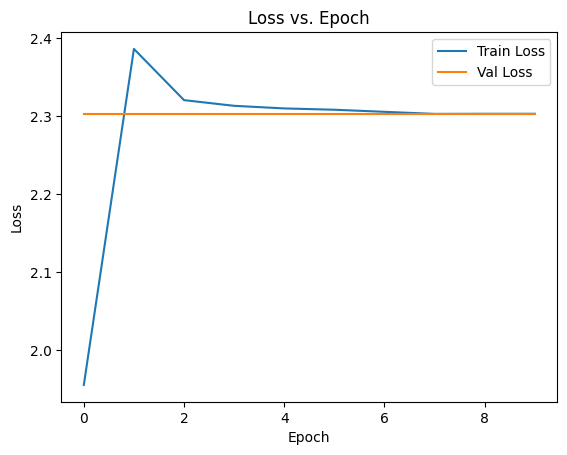

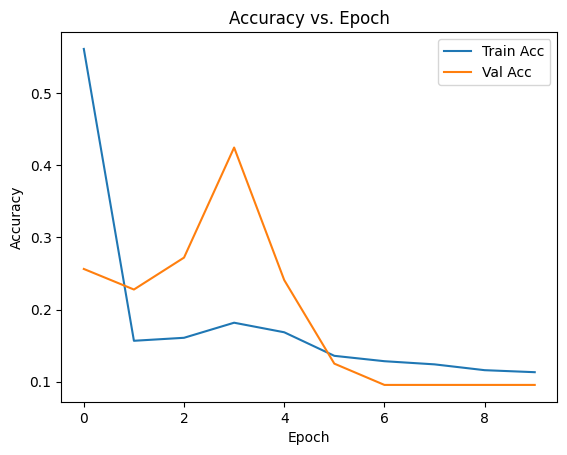

In [ ]:
# Broken CNN Model-1

model4 = models.Sequential([
    layers.Conv2D(32, 3, padding='same', activation='relu',input_shape=(28,28,1)),
    layers.MaxPooling2D(2),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='tanh'), # at the output layer tanh activation !!!
])

model4.summary()

model4.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model4.fit(
    x_train, y_train,
    batch_size=64,
    epochs=10,
    validation_split=0.2,
    verbose=2
)

plt.figure()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.legend()
plt.title('Loss vs. Epoch')
plt.show()

plt.figure()
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.legend()
plt.title('Accuracy vs. Epoch')
plt.show()

Broken CNN Model-2

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 28, 28, 32)     │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 14, 14, 64)     │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_14 (Flatten)            │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 64)             │       200,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 203,594 (795.29 KB)

 Trainable params: 203,594 (795.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
563/563 - 21s - 37ms/step - accuracy: 0.5776 - loss: 1.2149 - val_accuracy: 0.8224 - val_loss: 0.5707
Epoch 2/5
563/563 - 22s - 39ms/step - accuracy: 0.6741 - loss: 0.9382 - val_accuracy: 0.8555 - val_loss: 0.4873
Epoch 3/5
563/563 - 20s - 36ms/step - accuracy: 0.6879 - loss: 0.8955 - val_accuracy: 0.8527 - val_loss: 0.4821
Epoch 4/5
563/563 - 19s - 34ms/step - accuracy: 0.7041 - loss: 0.8634 - val_accuracy: 0.8570 - val_loss: 0.4685
Epoch 5/5
563/563 - 19s - 35ms/step - accuracy: 0.7057 - loss: 0.8397 - val_accuracy: 0.8531 - val_loss: 0.4635


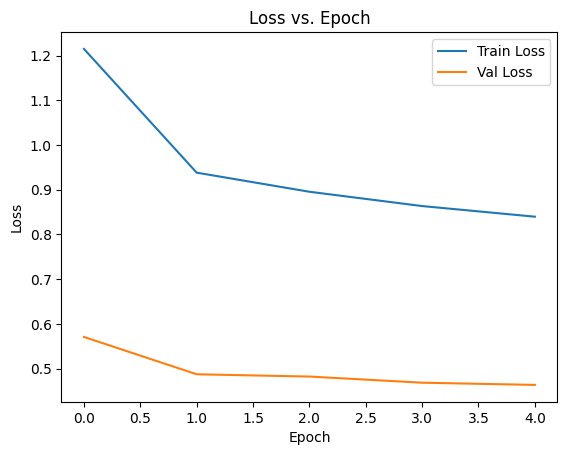

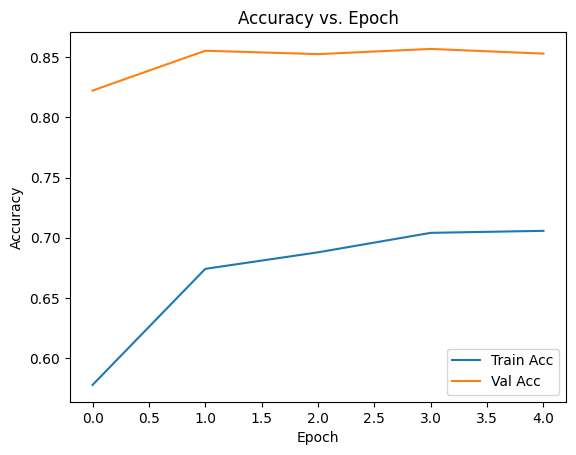

In [ ]:
# Broken CNN Model-2

model5 = models.Sequential([
    layers.Conv2D(32, 1, padding='same', activation='relu',input_shape=(28,28,1)),
    layers.MaxPooling2D(2),
    layers.Conv2D(64, 1, padding='same', activation='relu'),
    layers.MaxPooling2D(2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.7),
    layers.Dense(10, activation='softmax'),
])

model5.summary()

model5.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model5.fit(
    x_train, y_train,
    batch_size=64,

    epochs=5,
    validation_split=0.4,

    verbose=2
)

plt.figure()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.legend()
plt.title('Loss vs. Epoch')
plt.show()

plt.figure()
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.legend()
plt.title('Accuracy vs. Epoch')
plt.show()

Broken CNN Model-3

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 64)             │       200,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 220,234 (860.29 KB)

 Trainable params: 220,234 (860.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
750/750 - 62s - 83ms/step - accuracy: 0.0999 - loss: 3162.9604 - val_accuracy: 0.0956 - val_loss: 2.3825
Epoch 2/10
750/750 - 73s - 97ms/step - accuracy: 0.1000 - loss: 2.3705 - val_accuracy: 0.1060 - val_loss: 2.3707
Epoch 3/10
750/750 - 81s - 108ms/step - accuracy: 0.0988 - loss: 2.3747 - val_accuracy: 0.0995 - val_loss: 2.3346
Epoch 4/10
750/750 - 80s - 107ms/step - accuracy: 0.1031 - loss: 2.3768 - val_accuracy: 0.1060 - val_loss: 2.3554
Epoch 5/10
750/750 - 49s - 66ms/step - accuracy: 0.1024 - loss: 2.3697 - val_accuracy: 0.1035 - val_loss: 2.3379
Epoch 6/10
750/750 - 80s - 107ms/step - accuracy: 0.1004 - loss: 2.3753 - val_accuracy: 0.0989 - val_loss: 2.3514
Epoch 7/10
750/750 - 82s - 109ms/step - accuracy: 0.1011 - loss: 2.3724 - val_accuracy: 0.0956 - val_loss: 2.3814
Epoch 8/10
750/750 - 81s - 108ms/step - accuracy: 0.0988 - loss: 2.3737 - val_accuracy: 0.1081 - val_loss: 2.3691
Epoch 9/10
750/750 - 52s - 70ms/step - accuracy: 0.1005 - loss: 2.3743 - val_accuracy: 0

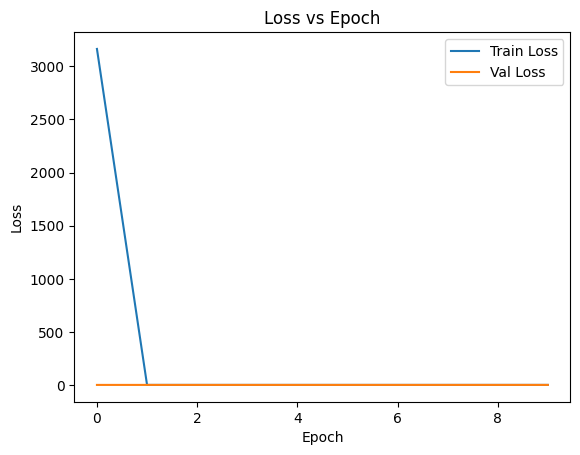

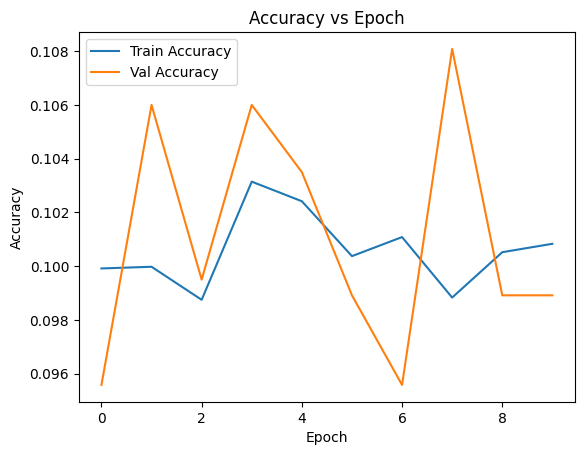

In [ ]:
# Broken CNN Model-3

model6 = models.Sequential([
    layers.Conv2D(32, 3, padding='same', activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(2),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model6.summary()

# Vey high lr rate!
optimizer = tf.keras.optimizers.Adam(learning_rate=1.0)

model6.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model6.fit(
    x_train, y_train,
    batch_size=64,
    epochs=10,
    validation_split=0.2,
    verbose=2
)

plt.figure()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.legend()
plt.title('Loss vs Epoch')
plt.show()

plt.figure()
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.legend()
plt.title('Accuracy vs Epoch')
plt.show()
